<a href="https://colab.research.google.com/github/Tam1979/TATA-ML/blob/master/w1_1_learning_notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning Jupyter Notebooks
===========================

Jupyter notebooks are an amazing way to learn about and try new things in Python.  Let's try the following.  See the following cell?  It has a couple lines of python code. Click in the box underneath this text and either press cntrl-enter, or press the "play" icon in the toolbar above this.  Watch what happens.

In [2]:
a = 1
a

1

In [4]:
#Enter your python code here
print('Machine Learning')

Machine Learning


Ipython notebooks can be used to visualize matlibplot plotting as well.

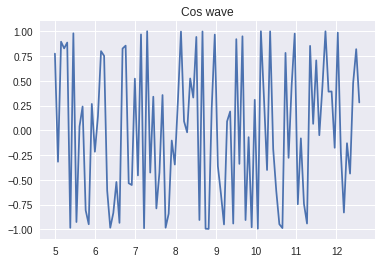

In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(5, 4*np.pi, 100)
plt.plot(x, np.sin(x**5))
plt.title('Cos wave')
plt.show()

# New Section

In [7]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "<link rel='stylesheet' href='../assets/css/main.css'/>\n",
    "\n",
    "[<< back to main index](../README.md)\n",
    "\n",
    "# Linear Regression in Sklearn \n",
    "\n",
    "### Overview\n",
    "Instructor to demo this on screen.\n",
    " \n",
    "### Builds on\n",
    "None\n",
    "\n",
    "### Run time\n",
    "approx. 20-30 minutes\n",
    "\n",
    "### Notes\n",
    "\n",
    "sklearn has a class called Linear Regression that can be used to do simple linear regression models."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "%matplotlib inline\n",
    "\n",
    "import numpy as np\n",
    "import pandas as pd\n",
    "import statsmodels.formula.api as sm\n",
    "import matplotlib.pyplot as plt\n",
    "from sklearn import linear_model\n",
    "from sklearn.metrics import mean_squared_error, r2_score\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Example : Tips\n",
    "Here is our tip data.  This shows 10 observations of bill with tip amounts."
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "| bill | tip | \n",
    "|------|-----| \n",
    "| 50   | 12  | \n",
    "| 30   | 7   | \n",
    "| 60   | 13  | \n",
    "| 40   | 8   | \n",
    "| 65   | 15  | \n",
    "| 20   | 5   | \n",
    "| 10   | 2   | \n",
    "| 15   | 2   | \n",
    "| 25   | 3   | \n",
    "| 35   | 4   | "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Step 1: Let's create a Pandas dataframe with the data\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {
    "attributes": {
     "classes": [
      "R"
     ],
     "id": ""
    }
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>bill</th>\n",
       "      <th>tip</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>50.0</td>\n",
       "      <td>12.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>30.0</td>\n",
       "      <td>7.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>60.0</td>\n",
       "      <td>13.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>40.0</td>\n",
       "      <td>8.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>65.0</td>\n",
       "      <td>15.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>20.0</td>\n",
       "      <td>5.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>10.0</td>\n",
       "      <td>2.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>15.0</td>\n",
       "      <td>2.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>25.0</td>\n",
       "      <td>3.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>35.0</td>\n",
       "      <td>4.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   bill   tip\n",
       "0  50.0  12.0\n",
       "1  30.0   7.0\n",
       "2  60.0  13.0\n",
       "3  40.0   8.0\n",
       "4  65.0  15.0\n",
       "5  20.0   5.0\n",
       "6  10.0   2.0\n",
       "7  15.0   2.0\n",
       "8  25.0   3.0\n",
       "9  35.0   4.0"
      ]
     },
     "execution_count": 2,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],\n",
    "              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]\n",
    "             })\n",
    "\n",
    "tip_data\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Step 2: Let's do a quick plot of the data\n",
    "\n",
    "Let us use matplotlib to do a quick scatter plot of the data.\n",
    "\n",
    "**=>TODO: plot the bill (X-axis), versus the tip (Y-axis)**"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "plt.scatter(tip_data.bill, tip_data.tip)\n",
    "plt.ylabel('tip')\n",
    "plt.xlabel('bill')\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "\n",
    "## Step 3: Run Linear Regression in Sklearn\n",
    "\n",
    "Let's run our linear regression.  To do this we need to run call the LinearRegression Classs"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {
    "attributes": {
     "classes": [
      "R"
     ],
     "id": ""
    },
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "# Create linear regression object\n",
    "regr = linear_model.LinearRegression()\n",
    "\n",
    "# Train the model using the training sets\n",
    "regr.fit(tip_data.bill.values.reshape(10,1), tip_data.tip.values.reshape(10,1))\n",
    "\n",
    "                  \n",
    "# The coefficients\n",
    "print('Coefficients: \\n', regr.coef_)\n",
    "\n",
    "intercept = regr.intercept_  # This is the intercept\n",
    "slope = regr.coef_[0] #This is the slope"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true,
    "scrolled": true
   },
   "outputs": [],
   "source": [
    "tip_data.tip"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Step 7: Plot the fit line (abline)\n",
    "\n",
    "**=>TODO: Do a scatterplot of bill versus tip **\n",
    "**=>TODO: rename variable \"tip\" as \"label\" **"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "# Create a list of values in the best fit line\n",
    "abline_values = [slope * i + intercept for i in tip_data.bill]\n",
    "\n",
    "# Plot the best fit line over the actual values\n",
    "plt.scatter(tip_data.bill, tip_data.tip)\n",
    "plt.plot(tip_data.bill, abline_values, 'b')\n",
    "plt.ylabel('tip')\n",
    "plt.xlabel('bill')\n",
    "plt.title(\"Fit Line\")\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "# Make predictions using the testing set\n",
    "y_pred = regr.predict(tip_data.bill.values.reshape(10,1))\n",
    "y_test = tip_data.tip.values.reshape(10,1)\n",
    "\n",
    "# The coefficients\n",
    "print('Coefficients: \\n', regr.coef_)\n",
    "# The mean squared error\n",
    "print(\"Mean squared error: %.2f\"\n",
    "      % mean_squared_error(y_test, y_pred))\n",
    "# Explained variance score: 1 is perfect prediction\n",
    "print('Variance score: %.2f' % r2_score(y_test, y_pred))\n",
    "\n",
    "\n",
    "# The coefficients\n",
    "print('Coefficients: \\n', regr.coef_)\n",
    "# The mean squared error\n",
    "print(\"Mean squared error: %.2f\"\n",
    "      % mean_squared_error(y_test, y_pred))\n",
    "# Explained variance score: 1 is perfect prediction\n",
    "print('Variance score: %.2f' % r2_score(y_test, y_pred))\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Step 8: Print out the Outputs\n",
    "\n",
    "Here is a sample output:"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Step 9: Plot the residuals\n",
    "\n",
    "Residuals are the error, or difference between the model predicted and model actual.  We'd like these to be as small as possible, with residuals roughly balanced.   We don't want a model that consistently predicts values too high or too low.\n",
    "\n",
    "**=>TODO: do a plot of the bill (x-value) versus residuals (y-value) **"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "resid = (slope * tip_data.bill + intercept) - tip_data.tip"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "plt.scatter(tip_data.bill, resid)\n",
    "plt.axhline(y=0, color='r', linestyle='-')  # horizon\n",
    "plt.ylabel('Residuals')\n",
    "plt.xlabel('bill')\n",
    "plt.title(\"Residuals\")\n",
    "plt.show()\n",
    "\n",
    "\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Step 10 : Identify Coefficients\n",
    "\n",
    "### Intercept and Slope\n",
    "We can see them from output"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {
    "attributes": {
     "classes": [
      "console"
     ],
     "id": ""
    },
    "collapsed": true
   },
   "source": [
    "Coefficients:\n",
    "            Estimate \n",
    "(Intercept) -0.8217112049846651\n",
    "bill        0.226334605857"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "- **Slope** (of line) : ** 0.226334605857**\n",
    "- **Intercept** (where line meets Y-axis) : **-0.8217112049846651**  (below zero line)\n",
    "\n",
    "We can also get these programatically.  \n",
    "If `tip = a * amount + b`"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "attributes": {
     "classes": [
      "R"
     ],
     "id": ""
    },
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "\n",
    "intercept = regr.intercept_  # This is the intercept\n",
    "slope = regr.coef_[0] #This is the slope\n",
    "\n",
    "# Print the coefficients and intercept for linear regression\n",
    "print(\"Coefficients: %s\" % str(slope))\n",
    "print(\"Intercept: %s\" % str(intercept))\n",
    "\n",
    "a = slope\n",
    "b = intercept\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "**==>  Question : Does bill amount influence tip amount? (are they strongly linked?) **\n",
    "\n",
    "\n",
    "## Coefficient of Determination (r&sup2;)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "attributes": {
     "classes": [
      "R"
     ],
     "id": ""
    },
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "# coefficient.of.determination (r^2) \n",
    "rsquared = r2_score(y_test, y_pred)\n",
    "rsquared"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "**==>  Question : What does r&sup2; tells us? **\n",
    "\n",
    "## Step 11: Calculate tip for $100 bill\n",
    "\n",
    "**=>TODO: perform the calculation for tip_for_100 using a,b coefficients **"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "attributes": {
     "classes": [
      "R"
     ],
     "id": ""
    },
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "tip_for_100 = a * 100 + b   \n",
    "print(tip_for_100)\n"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Step 12: Add a estimated_tip column to pandas dataframe\n",
    "\n",
    "**=>TODO: create a new pandas column called est_tip **"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "attributes": {
     "classes": [
      "R"
     ],
     "id": ""
    },
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "tip_data['est_tip'] =  ??? # How to do this?\n",
    "\n",
    "tip_data['est_tip'] = regr.predict(tip_data.bill.values.reshape(10,1)) #Another way to do it\n",
    "tip_data"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Step 13: Perform a prediction\n",
    "\n",
    "\n",
    "Let's try to run a prediction on some data: $45.00, $55.00, and $65.00 \n",
    "\n",
    "\n",
    "**=>TODO: use model to transform dataframe with feature vectors to make predictions **"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "test_data_pd = pd.DataFrame({'bill' : [45., 55., 65.,]\n",
    "             })\n",
    "\n",
    "test_data_pd['predicted_tip'] = regr.predict(test_data_pd.bill.values.reshape(3,1))\n",
    "\n",
    "\n",
    "\n",
    "test_data_pd"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.6.6"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}

NameError: ignored